In [249]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KernelDensity

In [ ]:
data = pd.read_csv(r"Enter Dataset location here", encoding='latin1')
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
print("Data Dimesnions:", data.shape)


Data Dimesnions: (16719, 16)


In [252]:
data.info()
print("\nMissing values in each column:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB

Missing v

In [253]:
data.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000,10096,9950
unique,11562,31,NaN,12,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000,NaN,NaN


In [254]:
#Data Preprocessing - 1 Handling Missing Values

number_cols = data.select_dtypes(include=['float64', 'int64']).columns
text_cols = data.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
data[number_cols] = num_imputer.fit_transform(data[number_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
data[text_cols] = cat_imputer.fit_transform(data[text_cols])


print("\nMissing values after handline missing values:")
print(data.isnull().sum())



Missing values after handline missing values:
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [255]:
#Data Preprocessing - 2A Removing irrelevant features

print("Shape before dropping column:\n", data.shape)
print("Total Columns in dataset:\n")

print(data.columns.tolist())

data = data.drop(columns=['Name', 'Developer'], errors='ignore')


print("Shape after dropping column:\n", data.shape)
print("Total columns after dropping column:\n", data.columns.tolist())

Shape before dropping column:
 (16719, 16)
Total Columns in dataset:

['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
Shape after dropping column:
 (16719, 14)
Total columns after dropping column:
 ['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']


In [256]:
# Encode Platform, Rating, and Top 10 Publishers directly in `data`
top_publishers = data['Publisher'].value_counts().nlargest(10).index
data['Publisher'] = data['Publisher'].where(data['Publisher'].isin(top_publishers), 'Other')

data = pd.get_dummies(data, columns=['Platform', 'Rating', 'Publisher'])


base_numeric = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
                'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
feature_columns = base_numeric + [col for col in data.columns if any(prefix in col for prefix in ['Platform_', 'Rating_', 'Publisher_'])]

data


,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Other,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft
0,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,...,False,False,False,True,False,False,False,False,False,False
1,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,...,False,False,False,True,False,False,False,False,False,False
2,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,...,False,False,False,True,False,False,False,False,False,False
3,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,...,False,False,False,True,False,False,False,False,False,False
4,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125046,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,Action,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,...,False,False,False,False,True,False,False,False,False,False
16715,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,7.125046,...,False,False,False,False,True,False,False,False,False,False
16716,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,...,False,False,False,False,True,False,False,False,False,False
16717,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,7.125046,...,False,False,False,False,True,False,False,False,False,False


In [257]:
#Data Preprocessing - 3A Feature Normalization (Min Max Scaling)

data_minmax = data.copy()
minmax_scaler = MinMaxScaler()
data_minmax[feature_columns] = minmax_scaler.fit_transform(data_minmax[feature_columns])


print("Data after Min-Max Normalization")
print(data_minmax[feature_columns])


Data after Min-Max Normalization
       Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                0.650  1.000000  1.000000  0.368885     0.799432   
1                0.125  0.703095  0.123619  0.666341     0.072848   
2                0.700  0.379110  0.440608  0.370841     0.311258   
3                0.725  0.377418  0.377417  0.320939     0.279092   
4                0.400  0.272485  0.306975  1.000000     0.094607   
...                ...       ...       ...       ...          ...   
16714            0.900  0.000000  0.000000  0.000978     0.000000   
16715            0.650  0.000000  0.000345  0.000000     0.000000   
16716            0.900  0.000000  0.000000  0.000978     0.000000   
16717            0.575  0.000242  0.000000  0.000000     0.000000   
16718            0.900  0.000000  0.000000  0.000978     0.000000   

       Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  ...  \
0          1.000000      0.741176      0.436364    0.82474

In [258]:
#Data Preprocessing - 3B Feature Normalization (Z-Score)

data_zscore = data.copy()
zscore_scaler = StandardScaler()
data_zscore[feature_columns] = zscore_scaler.fit_transform(data_zscore[feature_columns])

print("Data after Z-Score Normalization")
print(data_zscore[feature_columns])

Data after Z-Score Normalization
       Year_of_Release   NA_Sales   EU_Sales   JP_Sales  Other_Sales  \
0            -0.083575  50.518992  57.255699  11.956905    45.005218   
1            -3.684812  35.423530   6.825337  21.801182     3.870656   
2             0.259400  18.951283  25.066106  12.021669    17.367934   
3             0.430887  18.865234  21.429874  10.370162    15.546873   
4            -1.798450  13.530193  17.376370  32.843612     5.102551   
...                ...        ...        ...        ...          ...   
16714         1.631299  -0.323705  -0.288166  -0.218913    -0.253512   
16715        -0.083575  -0.323705  -0.268296  -0.251295    -0.253512   
16716         1.631299  -0.323705  -0.288166  -0.218913    -0.253512   
16717        -0.598038  -0.311412  -0.288166  -0.251295    -0.253512   
16718         1.631299  -0.323705  -0.288166  -0.218913    -0.253512   

       Global_Sales  Critic_Score  Critic_Count    User_Score    User_Count  \
0         52.973092    

In [259]:
#Data Preprocessing - 4A # Dimensionality Reduction -1 # Principal Component Analysis on Original Data.

target = 'Genre'


X_original = data[feature_columns].values
y_original = data[target].values


pca_original = PCA(n_components=0.95)
X_pca_original = pca_original.fit_transform(X_original)

data_PCA = pd.DataFrame(X_pca_original)
data_PCA['Genre'] = y_original

print(f"Original data: reduced to {data_PCA.shape[1]} features\n")

print(data_PCA)


Original data: reduced to 2 features

                0         Genre
0      160.193588        Sports
1        0.019789      Platform
2      547.403177        Racing
3       30.436739        Sports
4        0.021226  Role-Playing
...           ...           ...
16714    0.011975        Action
16715   -0.001321        Sports
16716    0.011955     Adventure
16717   -0.005333      Platform
16718    0.011955    Simulation

[16719 rows x 2 columns]


In [260]:
#Data Preprocessing - 4A # Dimensionality Reduction -1 # Principal Component Analysis on Min-max normalised Data.

X_minmax = data_minmax[feature_columns].values
y_minmax = data_minmax[target].values

pca_minmax = PCA(n_components=0.95)
X_minmax_pca = pca_minmax.fit_transform(X_minmax)


data_minmax_PCA = pd.DataFrame(X_minmax_pca)
data_minmax_PCA['Genre'] = y_minmax

print(f"Min-Max normalized data: reduced to {data_minmax_PCA.shape[1] - 1} PCA features\n")
print(data_minmax_PCA)

Min-Max normalized data: reduced to 28 PCA features

              0         1         2         3         4         5         6  \
0      0.392029 -0.563384 -0.061366  0.045038 -0.236247  0.514699  0.018955   
1      0.449881 -0.550637  0.082011  0.023636 -0.114503  0.023161  0.004821   
2      0.384535 -0.558379 -0.071889  0.040760 -0.242681  0.496451  0.011507   
3      0.383783 -0.556563 -0.075644  0.043543 -0.242311  0.499853  0.008845   
4      0.437098 -0.550820  0.046712  0.033184 -0.111184  0.026654 -0.024226   
...         ...       ...       ...       ...       ...       ...       ...   
16714  0.348300  0.452794 -0.078155 -0.133450 -0.273857 -0.113877 -0.586892   
16715  0.341409  0.477120 -0.082619 -0.151758 -0.232390 -0.090847  0.341038   
16716  0.426181  0.512012  0.003184 -0.059121 -0.139250  0.016101 -0.047715   
16717  0.483426  0.470401  0.071437 -0.063011 -0.192172  0.035134  0.035402   
16718  0.426181  0.512012  0.003184 -0.059121 -0.139250  0.016101 -0.047715   

In [261]:
#Data Preprocessing - 4A # Dimensionality Reduction -1 # Principal Component Analysis on Z-Score normalised Data.

X_zscore = data_zscore[feature_columns].values
y_zscore = data_zscore[target].values

pca_zscore = PCA(n_components=0.95)
X_zscore_pca = pca_zscore.fit_transform(X_zscore)

data_zscore_PCA = pd.DataFrame(X_zscore_pca)
data_zscore_PCA['Genre'] = y_zscore

print(f"Z-score normalized data: reduced to {data_zscore_PCA.shape[1] - 1} PCA features\n")
print(data_zscore_PCA)

Z-score normalized data: reduced to 49 PCA features

               0          1          2          3          4          5  \
0      92.574015   8.277013 -23.050575  13.361950  12.447150 -17.654684   
1      39.311764  13.458643  -9.404602   7.154502   4.698248   4.191134   
2      41.472894   4.857003  -9.675795   3.673868   4.456828  -3.845161   
3      37.585744   4.588028  -9.195154   3.671539   3.847636  -3.343201   
4      35.528406  13.108612 -10.334139   3.877982   3.324981   7.079713   
...          ...        ...        ...        ...        ...        ...   
16714  -0.729577  -0.747892  -0.654100  -1.204652   0.491488  -0.571167   
16715  -0.666535  -0.185378   0.025021  -0.466048   0.993102  -0.041644   
16716  -1.048885  -0.484186  -0.844032  -2.136210   1.277548   0.207244   
16717  -0.914873   1.295611   0.236080  -0.409995   0.580025   0.019240   
16718  -1.048885  -0.484186  -0.844032  -2.136210   1.277548   0.207244   

              6         7          8         9

In [262]:
#Data Preprocessing - 4B # Dimensionality Reduction -2 # Linear Discriminant  Analysis on Original Data.

X_original = data[feature_columns].values
y_original = data['Genre'].values

lda = LDA(n_components=None)
X_lda = lda.fit_transform(X_original, y_original)

data_LDA = pd.DataFrame(X_lda)
data_LDA['Genre'] = y_original

print(f"Original data: reduced to {X_lda.shape[1]} LDA features")
print(data_LDA.head())

Original data: reduced to 11 LDA features
          0         1          2         3         4          5          6  \
0 -4.032801  9.176515  10.087315  7.283993  8.404914  -9.996649  -3.368723   
1  1.865346 -0.515313   0.254495  7.021940  3.639063   6.163214  11.599928   
2 -1.106554  1.292888   2.142424  3.126129  2.525553  -0.468583   1.161732   
3 -1.031826  1.273010   2.304700  2.867949  2.531231  -0.952649   1.155976   
4  2.143967 -5.976633  -6.054666  4.427117 -1.149602  13.375160  10.112929   

          7         8          9         10         Genre  
0  2.228888 -5.928212  -5.134639  -9.229173        Sports  
1 -2.700159 -3.355353   5.778475 -12.977777      Platform  
2  0.501405  0.832189  -4.835970  -3.897434        Racing  
3  0.359916  0.483678  -2.732333  -3.903747        Sports  
4  0.494598  3.372474 -10.729648  -7.150889  Role-Playing  


In [263]:
# 🔹 Logistic Regression on Original Data

X = data[feature_columns].values
y = data['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_logreg_original = 0
report_logreg_original = ""

for i, test_size in enumerate(test_sizes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)
    print(f"Run {i+1}: Test Size = {int(test_size*100)}% → Accuracy: {acc:.2f}%")
    if acc > acc_logreg_original:
        acc_logreg_original = acc
        report_logreg_original = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nOriginal Data Test Accuracy on LogReg: {acc_logreg_original:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percent = np.nan_to_num(cm_percent)
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(cm_percent, 2)))
print("\nClassification Report:")
print(report_logreg_original)

Run 1: Test Size = 10% → Accuracy: 31.94%
Run 2: Test Size = 20% → Accuracy: 32.81%
Run 3: Test Size = 30% → Accuracy: 31.46%

Mean Accuracy: 32.07%
Accuracy Variance: 0.31
Mean Error Rate: 67.93%
Error Rate Variance: 0.31

Original Data Test Accuracy on LogReg: 32.81%

Confusion Matrix (% per actual class):

       0      1      2      3      4     5     6      7      8      9      10  \
0   61.28   3.06   1.89   5.68   1.89  0.00  2.33   5.09   7.71   1.46   8.30   
1   33.59  21.88   1.56  14.84   1.95  0.78  0.78   3.12   2.34   3.12  12.11   
2   34.10   6.94  15.03   3.47   0.00  0.00  2.31  14.45   3.47   0.00  19.08   
3   37.50   6.67   1.11  20.28   2.78  1.94  1.11   3.89   0.28   2.22  21.39   
4   38.42   2.11   0.53   5.79  12.63  1.05  2.63   4.74   0.00   2.11  29.47   
5   20.54   4.46   0.00  33.04   8.04  3.57  1.79   7.14   0.00   1.79  15.18   
6   30.83   2.92   2.50   5.83   2.92  0.42  7.50   2.08   0.83   1.67  39.17   
7   35.41   7.54   3.93   5.57   2.30  1.

In [264]:
# 🔹 Logistic Regression on PCA (Original Data)

X = data_PCA.drop(columns=['Genre']).values
y = data_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_logreg_pca = 0
report_logreg_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)
    
    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_logreg_pca:
        acc_logreg_pca = acc
        report_logreg_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)


print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA Data Test Accuracy on LogReg: {acc_logreg_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percent = np.nan_to_num(cm_percent)
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(cm_percent, 2)))

print("\nClassification Report:")
print(report_logreg_pca)


Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 20.87%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 20.48%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 19.84%

Mean Accuracy: 20.40%
Accuracy Variance: 0.18
Mean Error Rate: 79.60%
Error Rate Variance: 0.18

PCA Data Test Accuracy on LogReg: 20.87%

Confusion Matrix (% per actual class):

        0    1    2    3    4    5    6    7     8    9    10   11
0    98.85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.15  0.0  0.0  0.0
1   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
2   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
3   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
4   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
5   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
6   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
7   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
8    95.76  0.0  0.0  

In [265]:
# 🔹 Logistic Regression on LDA (Original Data)

X = data_LDA.drop(columns=['Genre']).values
y = data_LDA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_logreg_lda = 0
report_logreg_lda = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_logreg_lda:
        acc_logreg_lda = acc
        report_logreg_lda = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)


print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nLDA on Original Data Test Accuracy on Logistic Regression: {acc_logreg_lda:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percent = np.nan_to_num(cm_percent)
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(cm_percent, 2)))

print("\nClassification Report:")
print(report_logreg_lda)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 33.91%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 33.10%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 31.76%

Mean Accuracy: 32.92%
Accuracy Variance: 0.79
Mean Error Rate: 67.08%
Error Rate Variance: 0.79

LDA on Original Data Test Accuracy on Logistic Regression: 33.91%

Confusion Matrix (% per actual class):

       0      1      2      3      4      5      6      7      8      9   \
0   58.05   3.74   1.44   6.61   3.45   0.00   2.59   2.30   8.33   0.57   
1   28.79  31.06   1.52  11.36   2.27   1.52   0.76   1.52   1.52   3.79   
2   35.23   2.27  13.64   7.95   2.27   1.14   9.09  11.36   1.14   0.00   
3   32.20   3.39   1.13  24.86   2.82   2.82   2.82   5.08   0.00   3.39   
4   34.15   2.44   1.22  10.98  18.29   1.22   9.76   4.88   0.00   3.66   
5   10.00  10.00   0.00  33.33   6.67  10.00   6.67   5.00   0.00   3.33   
6   25.00   2.21   2.21   9.56   4.41   0.00  14.71   2.21   1.47   

In [266]:
# 🔹 Logistic Regression on MinMax Normalized Data

X = data_minmax[feature_columns].values
y = data_minmax['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_logreg_minmax = 0
report_logreg_minmax = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_logreg_minmax:
        acc_logreg_minmax = acc
        report_logreg_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)


print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nMinMax Data Test Accuracy on LogReg: {acc_logreg_minmax:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percent = np.nan_to_num(cm_percent)
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(cm_percent, 2)))

print("\nClassification Report:")
print(report_logreg_minmax)


Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 32.30%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.15%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 31.52%

Mean Accuracy: 31.99%
Accuracy Variance: 0.11
Mean Error Rate: 68.01%
Error Rate Variance: 0.11

MinMax Data Test Accuracy on LogReg: 32.30%

Confusion Matrix (% per actual class):

       0      1     2      3      4     5      6      7      8      9      10  \
0   59.48   2.30  1.15   7.76   3.16  0.00   2.30   2.30   8.05   0.57  10.92   
1   36.36  24.24  0.76  11.36   3.03  0.00   0.76   3.03   1.52   3.79   8.33   
2   40.91   2.27  7.95   4.55   2.27  1.14   7.95  12.50   1.14   0.00  19.32   
3   34.46   2.82  0.56  25.42   3.95  0.00   1.69   4.52   0.00   2.82  22.60   
4   31.71   3.66  0.00   8.54  18.29  1.22   8.54   4.88   0.00   3.66  19.51   
5    8.33   5.00  0.00  41.67  10.00  3.33   6.67   6.67   0.00   1.67  11.67   
6   26.47   3.68  0.74  10.29   2.94  0.00  10.29   2.2

In [267]:
# 🔹 Logistic Regression on PCA (MinMax Normalized Data)

X = data_minmax_PCA.drop(columns=['Genre']).values
y = data_minmax_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_logreg_pca_minmax = 0
report_logreg_pca_minmax = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_logreg_pca_minmax:
        acc_logreg_pca_minmax = acc
        report_logreg_pca_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on MinMax Data Test Accuracy on Logistic Regression: {acc_logreg_pca_minmax:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percent = np.nan_to_num(cm_percent)
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(cm_percent, 2)))

print("\nClassification Report:")
print(report_logreg_pca_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 30.44%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 30.35%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 29.98%

Mean Accuracy: 30.26%
Accuracy Variance: 0.04
Mean Error Rate: 69.74%
Error Rate Variance: 0.04

PCA on MinMax Data Test Accuracy on Logistic Regression: 30.44%

Confusion Matrix (% per actual class):

       0      1     2      3      4    5     6      7      8      9      10  \
0   58.05   1.15  0.86   6.90   2.87  0.0  1.15   2.59   8.33   0.57  14.94   
1   40.91  20.45  0.00  10.61   2.27  0.0  0.00   0.76   3.03   3.79  11.36   
2   47.73   1.14  5.68   4.55   1.14  0.0  4.55   9.09   2.27   0.00  23.86   
3   36.72   2.26  0.00  26.55   3.95  0.0  0.00   1.69   0.00   3.39  24.29   
4   28.05   2.44  0.00   8.54  19.51  0.0  6.10   4.88   0.00   4.88  24.39   
5   11.67   5.00  0.00  45.00   8.33  0.0  5.00   5.00   0.00   1.67  13.33   
6   30.88   1.47  0.00   9.56   4.41  0.0  3.68  

In [268]:
# 🔹 Logistic Regression on Z-Score Normalized Data

X = data_zscore[feature_columns].values
y = data_zscore['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_logreg_zscore = 0
report_logreg_zscore = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_logreg_zscore:
        acc_logreg_zscore = acc
        report_logreg_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nZScore Data Test Accuracy on LogReg: {acc_logreg_zscore:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percent = np.nan_to_num(cm_percent)
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(cm_percent, 2)))

print("\nClassification Report:")
print(report_logreg_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 33.19%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.54%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 31.96%

Mean Accuracy: 32.56%
Accuracy Variance: 0.25
Mean Error Rate: 67.44%
Error Rate Variance: 0.25

ZScore Data Test Accuracy on LogReg: 33.19%

Confusion Matrix (% per actual class):

       0      1      2      3      4     5      6      7      8      9   \
0   59.48   3.16   0.86   7.76   3.16  0.00   2.87   1.72   8.62   0.57   
1   37.12  23.48   0.76  12.12   3.03  0.00   2.27   1.52   1.52   3.79   
2   36.36   2.27  11.36   6.82   4.55  1.14   7.95  10.23   2.27   0.00   
3   32.20   4.52   1.13  24.86   3.39  1.13   2.26   4.52   0.00   2.82   
4   30.49   2.44   0.00   7.32  20.73  3.66   8.54   4.88   0.00   3.66   
5   10.00   6.67   0.00  35.00  11.67  5.00   6.67   6.67   0.00   1.67   
6   27.21   2.94   0.74   9.56   5.88  0.00  11.76   2.21   2.21   1.47   
7   41.88   5.00   1.8

In [269]:
# 🔹 Logistic Regression on PCA (Z-Score Normalized Data)

X = data_zscore_PCA.drop(columns=['Genre']).values
y = data_zscore_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_logreg_pca_zscore = 0
report_logreg_pca_zscore = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_logreg_pca_zscore:
        acc_logreg_pca_zscore = acc
        report_logreg_pca_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Z-Score Data Test Accuracy on Logistic Regression: {acc_logreg_pca_zscore:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percent = np.nan_to_num(cm_percent)
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(cm_percent, 2)))

print("\nClassification Report:")
print(report_logreg_pca_zscore)


Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 31.76%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.39%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 31.08%

Mean Accuracy: 31.74%
Accuracy Variance: 0.28
Mean Error Rate: 68.26%
Error Rate Variance: 0.28

PCA on Z-Score Data Test Accuracy on Logistic Regression: 32.39%

Confusion Matrix (% per actual class):

       0      1      2      3      4     5     6      7      8     9      10  \
0   58.95   5.53   1.60   6.11   2.33  0.44  2.04   4.51   7.71  1.02   8.73   
1   26.95  27.73   1.17  16.02   1.95  0.39  0.39   3.12   3.52  1.95  13.28   
2   35.84   8.09  12.72   4.62   0.00  0.58  4.62   8.67   4.05  0.00  20.23   
3   35.83   8.89   0.00  26.39   3.33  1.94  1.39   2.22   0.28  0.83  18.06   
4   32.63   2.11   1.05   9.47  11.05  1.05  5.26   4.21   1.05  1.58  29.47   
5   14.29   8.93   0.00  35.71   8.04  0.89  4.46   5.36   0.00  1.79  16.07   
6   26.25   2.50   2.50   9.58   2.50  0.

In [270]:
# 🔹 KNN on  Original Data

X = data[feature_columns].values
y = data['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_knn_original = 0
report_knn_original = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_knn_original:
        acc_knn_original = acc
        report_knn_original = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nOriginal Data Test Accuracy on KNN: {acc_knn_original:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_knn_original)



Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 27.33%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 26.20%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 24.12%

Mean Accuracy: 25.88%
Accuracy Variance: 1.77
Mean Error Rate: 74.12%
Error Rate Variance: 1.77

Original Data Test Accuracy on KNN: 27.33%

Confusion Matrix (% per actual class):

       0      1      2      3      4      5      6      7      8      9   \
0   56.90   5.17   3.74   7.76   0.86   0.86   3.16   6.61   5.75   1.72   
1   31.82  29.55   3.79   5.30   0.76   3.79   6.06   7.58   4.55   3.03   
2   29.55   7.95   9.09   3.41   5.68   2.27   6.82  12.50   6.82   0.00   
3   24.29   7.34   3.39  34.46   2.26   2.82   3.39   6.21   1.69   2.82   
4   24.39   6.10   6.10   8.54  14.63   0.00   6.10   3.66   7.32   6.10   
5   15.00  10.00  10.00  21.67   6.67  10.00  10.00   1.67   3.33   6.67   
6   37.50   2.21   5.15   3.68   7.35   0.74  11.76   2.21   9.56   5.15   
7   41.88   8.7

In [271]:
# 🔹 KNN on PCA (Original Data)

X = data_PCA.drop(columns=['Genre']).values
y = data_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_knn_pca = 0
report_knn_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_knn_pca:
        acc_knn_pca = acc
        report_knn_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA Data Test Accuracy on KNN: {acc_knn_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_knn_pca)


Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 17.70%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 18.87%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 18.66%

Mean Accuracy: 18.41%
Accuracy Variance: 0.26
Mean Error Rate: 81.59%
Error Rate Variance: 0.26

PCA Data Test Accuracy on KNN: 18.87%

Confusion Matrix (% per actual class):

       0      1     2      3     4     5     6     7      8     9      10  \
0   46.14   6.11  3.20   8.44  4.08  1.31  3.35  6.84   5.82  1.75  11.50   
1   41.02  24.22  2.34   9.38  3.12  3.12  4.30  3.52   1.56  2.34   4.69   
2   32.37   9.83  6.94   8.67  1.16  3.47  6.36  9.25   5.20  1.73  12.72   
3   37.50  10.83  5.56  17.22  2.50  2.50  1.94  6.11   1.11  3.61  10.56   
4   35.26   6.84  3.16   6.32  6.84  5.26  4.74  5.26   6.84  0.00  18.95   
5   35.71  11.61  3.57  14.29  0.00  6.25  3.57  4.46   2.68  0.89  16.96   
6   39.58   5.42  5.42  10.00  3.33  2.50  8.33  4.58   6.25  2.08  12.08   
7   45.90   

In [272]:
# 🔹 KNN on LDA (Original Data)

X = data_LDA.drop(columns=['Genre']).values
y = data_LDA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_knn_lda = 0
report_knn_lda = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_knn_lda:
        acc_knn_lda = acc
        report_knn_lda = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nLDA Data Test Accuracy on KNN: {acc_knn_lda:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_knn_lda)



Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 33.97%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 33.07%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 31.60%

Mean Accuracy: 32.88%
Accuracy Variance: 0.96
Mean Error Rate: 67.12%
Error Rate Variance: 0.96

LDA Data Test Accuracy on KNN: 33.97%

Confusion Matrix (% per actual class):

       0      1      2      3      4      5      6      7      8      9   \
0   53.74   6.32   2.87   7.76   2.59   1.15   2.59   5.75   8.62   1.72   
1   28.03  30.30   3.03   6.06   1.52   3.79   4.55  10.61   3.03   4.55   
2   30.68   9.09  23.86   5.68   1.14   2.27   9.09   6.82   4.55   1.14   
3   23.16   6.78   2.82  36.16   5.65   3.95   3.95   6.21   0.00   5.08   
4   30.49   6.10   2.44   6.10  24.39   7.32   7.32   3.66   1.22   2.44   
5   20.00  10.00   6.67  16.67   6.67  18.33   6.67   1.67   1.67   8.33   
6   31.62   4.41   5.88   5.15   8.09   2.21  18.38   1.47   4.41   2.94   
7   30.00  10.00   5

In [273]:
# 🔹 KNN on MinMax Normalized Data

X = data_minmax[feature_columns].values
y = data_minmax['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_knn_minmax = 0
report_knn_minmax = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_knn_minmax:
        acc_knn_minmax = acc
        report_knn_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nMinMax Data Test Accuracy on KNN: {acc_knn_minmax:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_knn_minmax)


Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 34.27%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.81%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.20%

Mean Accuracy: 32.43%
Accuracy Variance: 2.83
Mean Error Rate: 67.57%
Error Rate Variance: 2.83

MinMax Data Test Accuracy on KNN: 34.27%

Confusion Matrix (% per actual class):

       0      1      2      3      4      5      6      7      8      9   \
0   52.59   4.60   3.45   6.90   3.16   0.57   5.46   3.74   9.20   3.45   
1   28.79  30.30   4.55   3.79   1.52   4.55   4.55   9.09   4.55   3.79   
2   27.27   7.95  28.41   3.41   2.27   1.14   6.82   6.82   6.82   0.00   
3   20.90   6.78   4.52  36.16   3.95   2.26   4.52   8.47   0.00   3.39   
4   30.49   4.88   1.22   6.10  26.83   4.88   6.10   2.44   2.44   2.44   
5   15.00   6.67   5.00  16.67   6.67  23.33  11.67   1.67   1.67   5.00   
6   34.56   2.94   6.62   5.15   6.62   1.47  16.91   1.47   2.94   2.21   
7   32.50   7.50 

In [274]:
# 🔹 KNN on PCA (MinMax Normalized Data)


X = data_minmax_PCA.drop(columns=['Genre']).values
y = data_minmax_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_knn_minmax_pca = 0
report_knn_minmax_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_knn_minmax_pca:
        acc_knn_minmax_pca = acc
        report_knn_minmax_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on MinMax Data Test Accuracy on KNN: {acc_knn_minmax_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_knn_minmax_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 32.54%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 31.49%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 28.89%

Mean Accuracy: 30.97%
Accuracy Variance: 2.35
Mean Error Rate: 69.03%
Error Rate Variance: 2.35

PCA on MinMax Data Test Accuracy on KNN: 32.54%

Confusion Matrix (% per actual class):

       0      1      2      3      4      5      6      7      8      9   \
0   53.16   3.74   3.74   6.03   3.45   0.57   5.46   3.74  10.06   2.01   
1   28.03  31.82   3.03   5.30   3.03   4.55   4.55   7.58   3.79   4.55   
2   32.95  11.36  21.59   4.55   3.41   1.14   3.41   9.09   4.55   0.00   
3   22.03   6.78   3.39  33.33   4.52   3.95   3.95   7.34   1.13   3.95   
4   35.37   6.10   1.22   4.88  21.95   4.88   7.32   3.66   1.22   2.44   
5   21.67   6.67   6.67  13.33   8.33  16.67  10.00   3.33   0.00   8.33   
6   30.88   2.21   7.35   5.15   6.62   1.47  19.12   1.47   5.15   4.41   
7   31.25 

In [275]:
# 🔹 KNN on Z-Score Normalized Data

X = data_zscore[feature_columns].values
y = data_zscore['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_knn_zscore = 0
report_knn_zscore = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_knn_zscore:
        acc_knn_zscore = acc
        report_knn_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nZ-Score Normalized Data Test Accuracy on KNN: {acc_knn_zscore:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_knn_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 34.87%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.72%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.90%

Mean Accuracy: 32.83%
Accuracy Variance: 2.63
Mean Error Rate: 67.17%
Error Rate Variance: 2.63

Z-Score Normalized Data Test Accuracy on KNN: 34.87%

Confusion Matrix (% per actual class):

       0      1      2      3      4      5      6      7      8      9   \
0   54.02   4.89   2.87   6.90   3.16   0.29   4.60   4.31   8.91   2.59   
1   28.03  28.03   5.30   6.06   0.00   3.79   5.30   9.85   3.03   4.55   
2   26.14   9.09  27.27   4.55   1.14   1.14   6.82  10.23   5.68   1.14   
3   19.77   5.65   3.95  37.29   2.82   2.82   6.21   9.04   0.56   5.08   
4   29.27   4.88   2.44   7.32  17.07   7.32   7.32   4.88   4.88   1.22   
5   16.67   8.33   5.00  15.00   8.33  28.33   6.67   3.33   1.67   1.67   
6   34.56   3.68   3.68   7.35   5.88   2.21  21.32   0.00   2.21   2.94   
7   3

In [276]:
# 🔹 KNN on PCA (Z-Score Normalized Data)


X = data_zscore_PCA.drop(columns=['Genre']).values
y = data_zscore_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_knn_zscore_pca = 0
report_knn_zscore_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_knn_zscore_pca:
        acc_knn_zscore_pca = acc
        report_knn_zscore_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Z-Score Data Test Accuracy on KNN: {acc_knn_zscore_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):\n")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_knn_zscore_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 33.85%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 31.82%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.40%

Mean Accuracy: 32.02%
Accuracy Variance: 2.00
Mean Error Rate: 67.98%
Error Rate Variance: 2.00

PCA on Z-Score Data Test Accuracy on KNN: 33.85%

Confusion Matrix (% per actual class):

       0      1      2      3      4      5      6      7      8      9   \
0   54.31   4.60   3.45   6.03   4.31   0.29   4.60   3.45   9.77   2.30   
1   27.27  27.27   4.55   3.79   0.00   5.30   3.79  11.36   3.79   5.30   
2   28.41   7.95  21.59   5.68   1.14   1.14   6.82  12.50   4.55   1.14   
3   20.90   5.65   3.95  38.42   3.95   3.39   5.08   7.34   0.00   4.52   
4   28.05   3.66   4.88   8.54  17.07   7.32   3.66   7.32   2.44   2.44   
5   18.33   8.33   5.00  16.67   6.67  23.33   6.67   3.33   1.67   5.00   
6   31.62   5.88   5.88   7.35   2.94   2.21  21.32   0.00   3.68   1.47   
7   33.75

In [277]:
# 🔹 Random Forest on Original Data

X = data[feature_columns].values
y = data['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_rf_original = 0
report_rf_original = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_rf_original:
        acc_rf_original = acc
        report_rf_original = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nOriginal Data Test Accuracy on Random Forest: {acc_rf_original:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_rf_original)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 37.92%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 38.37%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 35.87%

Mean Accuracy: 37.38%
Accuracy Variance: 1.19
Mean Error Rate: 62.62%
Error Rate Variance: 1.19

Original Data Test Accuracy on Random Forest: 38.37%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   52.98   4.51   1.60   5.97   3.78   2.33   3.06   7.71   8.44   1.75   
1   28.12  30.86   1.17   6.64   2.73   2.73   2.73   9.77   5.08   1.17   
2   24.86   8.67  23.12   4.05   0.58   0.00   5.78  14.45   6.36   1.16   
3   20.28   7.22   2.22  31.39   3.33   3.89   4.72   4.72   1.39   6.39   
4   25.79   3.16   2.63   6.84  25.26   4.21   8.95   4.21   3.16   2.11   
5   12.50   8.04   6.25  13.39   5.36  20.54   8.93   2.68   1.79   6.25   
6   19.58   3.33   2.92   6.25   5.42   1.67  26.25   1.67   5.00   3.75   
7   26

In [278]:
# 🔹 Random Forest on PCA (Original Data)

X = data_PCA.drop(columns=['Genre']).values
y = data_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_rf_pca = 0
report_rf_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_rf_pca:
        acc_rf_pca = acc
        report_rf_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Original Data Test Accuracy on Random Forest: {acc_rf_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_rf_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 14.00%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 15.34%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 15.17%

Mean Accuracy: 14.84%
Accuracy Variance: 0.36
Mean Error Rate: 85.16%
Error Rate Variance: 0.36

PCA on Original Data Test Accuracy on Random Forest: 15.34%

Confusion Matrix (% per actual class):
       0      1     2      3     4     5      6      7      8      9      10  \
0   23.00   7.28  3.64   8.73  6.84  2.18   6.55  11.64   7.42   4.51  14.56   
1   20.70  25.78  3.52   9.77  7.03  4.69   4.69   5.86   4.69   3.91   7.42   
2   16.18  10.40  9.25   9.83  4.05  2.89   7.51  12.14   6.94   2.31  12.72   
3   18.61  10.28  5.56  15.83  4.44  3.06   5.28   7.22   7.22   8.33  11.94   
4   18.42   5.26  8.42   6.84  7.89  5.26   8.95   8.42   8.95   3.68  12.11   
5   14.29   6.25  5.36  16.96  6.25  4.46   8.93   8.04   0.89   6.25  19.64   
6   18.33   4.58  5.00   7.50  5.83  3.33  12.0

In [279]:
# 🔹 Random Forest on LDA (Original Data)

X = data_LDA.drop(columns=['Genre']).values
y = data_LDA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_rf_lda = 0
report_rf_lda = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_rf_lda:
        acc_rf_lda = acc
        report_rf_lda = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nLDA on Original Data Test Accuracy on Random Forest: {acc_rf_lda:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_rf_lda)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 34.63%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 33.91%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 32.16%

Mean Accuracy: 33.57%
Accuracy Variance: 1.08
Mean Error Rate: 66.43%
Error Rate Variance: 1.08

LDA on Original Data Test Accuracy on Random Forest: 34.63%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   48.28   5.46   2.87   7.18   3.74   0.86   4.60   4.02   9.20   3.45   
1   22.73  24.24   4.55   6.82   5.30   6.06   7.58   7.58   3.79   3.03   
2   22.73   5.68  25.00   7.95   1.14   1.14   9.09  11.36   5.68   1.14   
3   16.38   5.08   1.13  36.16   2.82   4.52   4.52   7.34   1.69   5.08   
4   20.73   3.66   1.22   9.76  23.17   8.54   9.76   9.76   1.22   1.22   
5    6.67   3.33   3.33  15.00   3.33  23.33  13.33  11.67   3.33   6.67   
6   22.79   2.94   5.88   5.15   8.82   2.94  20.59   2.21   2.94   2.21   

In [280]:
# 🔹 Random Forest on MinMax Normalized Data

X = data_minmax[feature_columns].values
y = data_minmax['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_rf_minmax = 0
report_rf_minmax = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_rf_minmax:
        acc_rf_minmax = acc
        report_rf_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nMinMax Normalized Data Test Accuracy on Random Forest: {acc_rf_minmax:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_rf_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 37.98%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 38.40%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 36.04%

Mean Accuracy: 37.47%
Accuracy Variance: 1.05
Mean Error Rate: 62.53%
Error Rate Variance: 1.05

MinMax Normalized Data Test Accuracy on Random Forest: 38.40%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   53.57   4.51   1.60   5.53   3.78   2.47   2.91   7.86   8.30   1.60   
1   27.73  31.25   0.78   6.64   3.12   2.34   2.73   9.77   5.08   1.56   
2   24.28   8.67  23.12   4.05   0.58   0.00   5.20  15.03   6.94   1.16   
3   20.00   7.50   1.94  30.56   3.06   4.17   4.72   5.28   1.67   6.67   
4   26.32   2.63   2.63   6.32  25.26   3.68  10.00   4.21   3.16   2.11   
5   12.50   8.04   7.14  13.39   6.25  19.64   8.04   2.68   1.79   6.25   
6   19.58   2.92   2.50   5.83   5.42   1.67  26.67   1.67   5.42   3.75 

In [281]:
# 🔹 Random Forest on PCA (MinMax Normalized Data)

X = data_minmax_PCA.drop(columns=['Genre']).values
y = data_minmax_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_rf_minmax_pca = 0
report_rf_minmax_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_rf_minmax_pca:
        acc_rf_minmax_pca = acc
        report_rf_minmax_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on MinMax Data Test Accuracy on Random Forest: {acc_rf_minmax_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_rf_minmax_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 32.54%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.06%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 29.37%

Mean Accuracy: 31.32%
Accuracy Variance: 1.95
Mean Error Rate: 68.68%
Error Rate Variance: 1.95

PCA on MinMax Data Test Accuracy on Random Forest: 32.54%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   43.10   5.17   3.16   6.61   4.89   2.30   4.31   5.46  10.92   4.02   
1   22.73  25.76   5.30   6.82   2.27   4.55   3.03   9.09   3.79   6.82   
2   21.59  11.36  21.59   2.27   6.82   1.14   7.95   7.95  10.23   2.27   
3   16.95   6.21   1.69  32.20   3.39   5.08   4.52   7.91   1.13   7.91   
4   19.51   4.88   3.66   6.10  23.17   7.32  18.29   4.88   3.66   0.00   
5    6.67   3.33   5.00  11.67  10.00  21.67  10.00   6.67   5.00  10.00   
6   19.85   3.68   5.88   5.15   6.62   2.94  19.12   2.21   7.35   4.41   
7

In [282]:
# 🔹 Random Forest on Z-Score Normalized Data

X = data_zscore[feature_columns].values
y = data_zscore['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_rf_zscore = 0
report_rf_zscore = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_rf_zscore:
        acc_rf_zscore = acc
        report_rf_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nZ-Score Normalized Data Test Accuracy on Random Forest: {acc_rf_zscore:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_rf_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 38.10%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 38.34%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 35.98%

Mean Accuracy: 37.47%
Accuracy Variance: 1.12
Mean Error Rate: 62.53%
Error Rate Variance: 1.12

Z-Score Normalized Data Test Accuracy on Random Forest: 38.34%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   52.84   4.51   1.60   5.68   3.64   2.47   2.91   8.01   8.44   1.75   
1   28.12  31.25   0.78   7.03   3.12   2.34   2.73  10.16   5.08   1.17   
2   24.28   8.67  23.70   4.05   0.58   0.00   6.36  14.45   6.36   1.16   
3   20.28   7.50   1.94  31.11   3.33   3.61   5.00   4.72   1.67   6.39   
4   25.26   3.16   2.63   6.32  25.79   3.68  10.00   4.21   3.68   2.11   
5   12.50   9.82   7.14  13.39   5.36  18.75   8.93   2.68   1.79   6.25   
6   19.58   3.33   2.92   5.83   5.42   1.25  27.50   1.67   5.00   3.33

In [283]:
# 🔹 Random Forest on PCA (Z-Score Normalized Data)


X = data_zscore_PCA.drop(columns=['Genre']).values
y = data_zscore_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_rf_zscore_pca = 0
report_rf_zscore_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_rf_zscore_pca:
        acc_rf_zscore_pca = acc
        report_rf_zscore_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Z-Score Data Test Accuracy on Random Forest: {acc_rf_zscore_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_rf_zscore_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 34.63%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 33.61%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 31.54%

Mean Accuracy: 33.26%
Accuracy Variance: 1.65
Mean Error Rate: 66.74%
Error Rate Variance: 1.65

PCA on Z-Score Data Test Accuracy on Random Forest: 34.63%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   48.28   5.46   3.45   6.61   4.31   1.44   4.89   4.31   9.48   2.87   
1   22.73  26.52   5.30   7.58   3.03   4.55   6.82   6.82   3.79   6.06   
2   22.73   7.95  28.41   5.68   2.27   1.14   9.09   7.95   4.55   3.41   
3   16.95   5.08   1.69  38.98   5.08   4.52   6.21   4.52   1.13   5.65   
4   21.95   3.66   2.44   3.66  21.95   8.54  13.41   7.32   3.66   0.00   
5   13.33   3.33   3.33  15.00  10.00  23.33   6.67   5.00   6.67   5.00   
6   22.06   2.21   5.15   6.62   7.35   2.94  22.79   3.68   3.68   0.74   


In [284]:
X = data[feature_columns].values
y = data['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_lsvc_original = 0
report_lsvc_original = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LinearSVC(max_iter=10000, dual=False, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_lsvc_original:
        acc_lsvc_original = acc
        report_lsvc_original = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nOriginal Data Test Accuracy on LinearSVC: {acc_lsvc_original:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_lsvc_original)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 31.10%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 31.88%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.44%

Mean Accuracy: 31.14%
Accuracy Variance: 0.34
Mean Error Rate: 68.86%
Error Rate Variance: 0.34

Original Data Test Accuracy on LinearSVC: 31.88%

Confusion Matrix (% per actual class):
       0      1     2      3     4     5     6      7      8     9      10  \
0   61.57   2.47  0.87   6.99  0.44  0.15  2.77   3.64   8.30  0.44  11.06   
1   35.16  21.48  0.78  16.41  0.39  0.00  1.56   1.95   1.95  0.39  16.02   
2   37.57   5.20  6.94   4.05  0.00  0.00  3.47  13.87   3.47  0.00  24.28   
3   33.61   5.83  1.11  26.94  1.11  0.28  1.39   5.00   0.00  0.00  23.61   
4   38.95   1.05  0.53  10.00  2.63  1.05  5.26   5.79   0.00  1.05  32.63   
5   21.43   3.57  0.00  38.39  1.79  2.68  2.68   8.04   0.89  0.00  16.07   
6   27.92   0.83  0.83   7.08  0.83  0.00  6.25   1.67   0.83  0.42  49.

In [285]:
# 🔹 LinearSVC on PCA (Original Data)

X = data_PCA.drop(columns=['Genre']).values
y = data_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_lsvc_pca = 0
report_lsvc_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LinearSVC(max_iter=10000, dual=False, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_lsvc_pca:
        acc_lsvc_pca = acc
        report_lsvc_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Original Data Test Accuracy on LinearSVC: {acc_lsvc_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_lsvc_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 20.93%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 20.54%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 19.88%

Mean Accuracy: 20.45%
Accuracy Variance: 0.19
Mean Error Rate: 79.55%
Error Rate Variance: 0.19

PCA on Original Data Test Accuracy on LinearSVC: 20.93%

Confusion Matrix (% per actual class):
        0    1    2    3    4    5    6    7     8    9    10   11
0    98.85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.15  0.0  0.0  0.0
1   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
2   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
3   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
4   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
5   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
6   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
7   100.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0
8    94.

In [286]:
# 🔹 LinearSVC on LDA (Original Data)

X = data_LDA.drop(columns=['Genre']).values
y = data_LDA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_lsvc_lda = 0
report_lsvc_lda = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LinearSVC(max_iter=10000, dual=False, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_lsvc_lda:
        acc_lsvc_lda = acc
        report_lsvc_lda = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nLDA on Original Data Test Accuracy on LinearSVC: {acc_lsvc_lda:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_lsvc_lda)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 32.00%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.78%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.98%

Mean Accuracy: 31.92%
Accuracy Variance: 0.54
Mean Error Rate: 68.08%
Error Rate Variance: 0.54

LDA on Original Data Test Accuracy on LinearSVC: 32.78%

Confusion Matrix (% per actual class):
       0      1     2      3     4     5     6      7      8     9      10  \
0   64.19   2.62  0.44   5.68  1.31  0.00  2.47   4.22   6.99  0.58  10.77   
1   34.77  20.70  0.00  16.41  0.39  0.00  1.56   2.73   2.34  0.39  18.36   
2   34.10   5.78  9.25   4.05  0.00  0.00  5.78  13.87   2.31  0.00  24.28   
3   33.89   6.11  0.56  25.56  1.67  0.00  1.67   3.61   0.56  0.28  25.56   
4   34.74   1.05  1.58   7.89  7.37  0.53  6.84   5.79   0.53  1.05  32.11   
5   19.64   3.57  0.00  36.61  7.14  0.89  2.68   8.04   0.00  0.00  17.86   
6   26.25   1.67  0.83   5.42  1.25  0.00  7.92   2.08   0.83  0.

In [287]:
# 🔹 LinearSVC on MinMax Normalized Data

X = data_minmax[feature_columns].values
y = data_minmax['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_lsvc_minmax = 0
report_lsvc_minmax = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LinearSVC(max_iter=10000, dual=False, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_lsvc_minmax:
        acc_lsvc_minmax = acc
        report_lsvc_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nMinMax Normalized Data Test Accuracy on LinearSVC: {acc_lsvc_minmax:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_lsvc_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 31.70%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.30%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 31.24%

Mean Accuracy: 31.75%
Accuracy Variance: 0.19
Mean Error Rate: 68.25%
Error Rate Variance: 0.19

MinMax Normalized Data Test Accuracy on LinearSVC: 32.30%

Confusion Matrix (% per actual class):
       0      1     2      3     4     5     6      7      8     9      10  \
0   62.88   2.77  1.31   6.40  1.60  0.15  0.87   2.91   6.99  0.44  12.81   
1   34.38  22.66  0.39  16.02  0.39  0.00  0.00   2.73   3.12  0.39  17.19   
2   34.10   7.51  8.67   4.62  0.00  0.00  1.16  13.87   2.31  0.00  27.17   
3   34.17   6.94  0.28  25.56  1.94  0.00  0.56   3.89   0.28  0.00  25.83   
4   37.37   1.05  0.53   9.47  6.84  0.00  3.68   5.79   0.53  1.05  33.16   
5   17.86   2.68  0.00  36.61  8.04  0.00  0.89   8.93   0.00  0.00  21.43   
6   25.42   2.50  1.67   5.00  1.25  0.00  3.33   2.08   1.67  

In [288]:
# 🔹 LinearSVC on PCA (MinMax Normalized Data)

X = data_minmax_PCA.drop(columns=['Genre']).values
y = data_minmax_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_lsvc_minmax_pca = 0
report_lsvc_minmax_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LinearSVC(max_iter=10000, dual=False, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_lsvc_minmax_pca:
        acc_lsvc_minmax_pca = acc
        report_lsvc_minmax_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on MinMax Data Test Accuracy on LinearSVC: {acc_lsvc_minmax_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_lsvc_minmax_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 29.37%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 29.67%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 29.35%

Mean Accuracy: 29.46%
Accuracy Variance: 0.02
Mean Error Rate: 70.54%
Error Rate Variance: 0.02

PCA on MinMax Data Test Accuracy on LinearSVC: 29.67%

Confusion Matrix (% per actual class):
       0      1     2      3     4     5     6      7      8     9      10  \
0   57.93   2.33  0.58   5.97  0.87  0.15  0.87   3.93   9.02  0.58  16.45   
1   30.86  12.50  0.78  16.80  0.78  0.00  0.00   2.73   3.91  0.39  27.34   
2   35.26   1.16  5.20   5.78  0.00  0.00  0.00  10.40   2.89  0.00  38.15   
3   35.83   3.61  0.00  26.67  1.94  0.00  0.28   1.39   0.00  0.00  29.44   
4   35.26   1.05  0.53   8.95  8.42  0.00  2.63   3.68   0.00  1.58  37.37   
5   16.07   3.57  0.00  41.96  8.04  0.00  0.00   3.57   0.00  0.00  23.21   
6   28.33   0.42  0.42   7.92  1.25  0.00  1.67   1.25   0.00  0.83

In [289]:
# 🔹 LinearSVC on Z-Score Normalized Data

X = data_zscore[feature_columns].values
y = data_zscore['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_lsvc_zscore = 0
report_lsvc_zscore = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LinearSVC(max_iter=10000, dual=False, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_lsvc_zscore:
        acc_lsvc_zscore = acc
        report_lsvc_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nZ-Score Normalized Data Test Accuracy on LinearSVC: {acc_lsvc_zscore:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_lsvc_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 31.94%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.09%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 31.28%

Mean Accuracy: 31.77%
Accuracy Variance: 0.12
Mean Error Rate: 68.23%
Error Rate Variance: 0.12

Z-Score Normalized Data Test Accuracy on LinearSVC: 32.09%

Confusion Matrix (% per actual class):
       0      1     2      3     4     5     6      7      8     9      10  \
0   62.45   2.91  1.31   6.11  1.46  0.15  1.16   3.93   6.99  0.44  12.23   
1   34.77  23.05  0.39  16.02  0.39  0.00  0.78   3.12   3.12  0.39  15.23   
2   33.53   7.51  9.83   4.62  0.00  0.00  1.16  13.29   2.31  0.00  27.17   
3   33.33   6.67  0.28  25.00  1.67  0.00  0.56   5.00   0.56  0.00  26.39   
4   36.84   1.05  1.05   9.47  7.37  0.00  3.16   4.21   0.53  1.58  34.21   
5   20.54   4.46  0.00  37.50  7.14  0.00  0.89   7.14   0.89  0.00  17.86   
6   25.83   2.08  1.67   5.42  1.25  0.00  2.50   2.50   1.67 

In [290]:
# 🔹 LinearSVC on PCA (Z-Score Normalized Data)


X = data_zscore_PCA.drop(columns=['Genre']).values
y = data_zscore_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_lsvc_zscore_pca = 0
report_lsvc_zscore_pca = ""

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = LinearSVC(max_iter=10000, dual=False, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_lsvc_zscore_pca:
        acc_lsvc_zscore_pca = acc
        report_lsvc_zscore_pca = classification_report(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Z-Score Data Test Accuracy on LinearSVC: {acc_lsvc_zscore_pca:.2f}%")
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_lsvc_zscore_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 31.16%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.24%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.96%

Mean Accuracy: 31.45%
Accuracy Variance: 0.31
Mean Error Rate: 68.55%
Error Rate Variance: 0.31

PCA on Z-Score Data Test Accuracy on LinearSVC: 32.24%

Confusion Matrix (% per actual class):
       0      1     2      3     4     5     6      7      8     9      10  \
0   62.59   3.06  0.29   6.55  1.60  0.15  0.58   3.49   7.28  0.58  12.95   
1   35.16  21.48  0.78  15.23  0.78  0.00  0.00   1.17   3.52  0.39  17.97   
2   33.53   7.51  7.51   4.62  0.00  0.00  1.16  12.14   2.89  0.00  29.48   
3   36.39   6.39  0.00  25.56  2.22  0.00  0.28   3.06   0.00  0.00  25.00   
4   35.79   1.05  0.53   8.42  8.42  0.00  2.11   5.79   0.53  1.05  35.79   
5   17.86   3.57  0.00  41.07  8.04  0.00  0.00   4.46   0.00  0.00  21.43   
6   24.17   0.83  1.25   7.08  1.25  0.00  1.67   1.25   1.25  0.4

In [321]:
class customNaivebayes:
    def __init__(self):
        self.class_priors = {}
        self.means = {}
        self.vars = {}
        self.classes = []

    def fit(self, X, y):
        X = np.asarray(X).astype(float)
        y = np.asarray(y)
        self.classes = np.unique(y)

        for cls in self.classes:
            X_cls = X[y == cls]
            self.class_priors[cls] = len(X_cls) / len(X)
            self.means[cls] = np.mean(X_cls, axis=0)
            self.vars[cls] = np.var(X_cls, axis=0) + 1e-6  # Add epsilon to avoid divide-by-zero

    def predict(self, X):
        X = np.asarray(X).astype(float)
        predictions = []

        for sample in X:
            class_probs = {}
            for cls in self.classes:
                mean = self.means[cls]
                var = self.vars[cls]
                log_prior = np.log(self.class_priors[cls])

                # Gaussian Naive Bayes log-likelihood
                log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var))
                log_likelihood -= 0.5 * np.sum(((sample - mean) ** 2) / var)
                class_probs[cls] = log_prior + log_likelihood

            predictions.append(max(class_probs, key=class_probs.get))

        return np.array(predictions)

In [322]:
X = data[feature_columns].values
y = data['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_nb_original = 0
report_custom_nb_original = ""
cm_best = None

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = CustomNaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_nb_original:
        acc_custom_nb_original = acc
        report_custom_nb_original = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nOriginal Data Test Accuracy on CustomNaiveBayes: {acc_custom_nb_original:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_nb_original)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 15.49%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 14.50%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 14.37%

Mean Accuracy: 14.79%
Accuracy Variance: 0.25
Mean Error Rate: 85.21%
Error Rate Variance: 0.25

Original Data Test Accuracy on CustomNaiveBayes: 15.49%

Confusion Matrix (% per actual class):
      0      1      2     3     4      5     6     7      8      9      10  \
0   5.46  24.14   3.45  3.45  0.86  27.59  0.29  0.57  19.54  10.92   1.44   
1   0.00  32.58   3.03  0.76  0.76  43.94  0.00  0.00   5.30  13.64   0.00   
2   0.00  21.59  22.73  0.00  0.00  27.27  2.27  2.27   4.55  15.91   2.27   
3   2.26  15.25   2.26  2.26  0.56  50.28  0.00  0.00   5.08  16.95   4.52   
4   1.22   6.10   6.10  4.88  7.32  51.22  0.00  0.00   3.66  14.63   3.66   
5   0.00   5.00   0.00  0.00  0.00  86.67  0.00  0.00   1.67   6.67   0.00   
6   0.74  19.12  10.29  3.68  0.00  29.41  0.74  0.00  10.29  19.

In [323]:
X = data_minmax[feature_columns].values
y = data_minmax['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_nb_minmax = 0
report_custom_nb_minmax = ""
cm_best = None

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = CustomNaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_nb_minmax:
        acc_custom_nb_minmax = acc
        report_custom_nb_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nMinMax Normalized Data Test Accuracy on CustomNaiveBayes: {acc_custom_nb_minmax:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_nb_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 15.37%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 14.50%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 14.39%

Mean Accuracy: 14.76%
Accuracy Variance: 0.19
Mean Error Rate: 85.24%
Error Rate Variance: 0.19

MinMax Normalized Data Test Accuracy on CustomNaiveBayes: 15.37%

Confusion Matrix (% per actual class):
      0      1      2     3     4      5     6     7      8      9      10  \
0   5.46  24.14   3.45  3.45  0.86  27.59  0.29  0.57  19.54  10.92   1.44   
1   0.00  32.58   3.03  0.76  0.76  43.94  0.00  0.00   5.30  13.64   0.00   
2   0.00  21.59  22.73  0.00  0.00  27.27  2.27  2.27   4.55  15.91   2.27   
3   2.26  15.25   2.26  2.26  0.56  50.28  0.00  0.00   5.08  16.95   4.52   
4   1.22   6.10   6.10  4.88  7.32  51.22  0.00  0.00   3.66  14.63   3.66   
5   0.00   5.00   0.00  0.00  0.00  86.67  0.00  0.00   1.67   6.67   0.00   
6   0.74  19.12  10.29  3.68  0.00  29.41  0.74  0.00  1

In [324]:
X = data_zscore[feature_columns].values
y = data_zscore['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_nb_zscore = 0
report_custom_nb_zscore = ""
cm_best = None

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = CustomNaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_nb_zscore:
        acc_custom_nb_zscore = acc
        report_custom_nb_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nZ-Score Normalized Data Test Accuracy on CustomNaiveBayes: {acc_custom_nb_zscore:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_nb_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 12.62%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 12.83%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 13.06%

Mean Accuracy: 12.84%
Accuracy Variance: 0.03
Mean Error Rate: 87.16%
Error Rate Variance: 0.03

Z-Score Normalized Data Test Accuracy on CustomNaiveBayes: 13.06%

Confusion Matrix (% per actual class):
      0     1      2    3     4      5      6     7      8      9     10    11
0   8.51  8.01   3.00  0.0  0.10  33.03   8.41  0.10  10.11  27.53  1.20  0.00
1   5.43  9.63   4.94  0.0  0.49  41.23   4.44  0.00   3.46  30.12  0.25  0.00
2   4.44  3.23  12.90  0.0  0.40  31.45   9.68  0.00   2.42  35.48  0.00  0.00
3   3.56  1.39   0.99  0.4  1.39  44.55  12.08  0.20   1.78  33.27  0.40  0.00
4   4.71  0.72   1.45  0.0  4.35  51.09  13.41  0.00   1.45  21.01  1.45  0.36
5   1.16  1.16   1.73  0.0  1.16  75.14   4.62  0.00   0.00  15.03  0.00  0.00
6   2.08  1.56   2.60  0.0  1.04  32.47  17.14  

In [325]:

X = data_PCA.drop(columns=['Genre']).values
y = data_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_nb_pca = 0
report_custom_nb_pca = ""
cm_best = None

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = CustomNaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_nb_pca:
        acc_custom_nb_pca = acc
        report_custom_nb_pca = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Original Data Test Accuracy on CustomNaiveBayes: {acc_custom_nb_pca:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_nb_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 15.43%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 16.39%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 15.43%

Mean Accuracy: 15.75%
Accuracy Variance: 0.20
Mean Error Rate: 84.25%
Error Rate Variance: 0.20

PCA on Original Data Test Accuracy on CustomNaiveBayes: 16.39%

Confusion Matrix (% per actual class):
      0    1    2      3    4    5    6     7     8    9      10   11
0   5.53  0.0  0.0  48.62  0.0  0.0  0.0  0.44  2.47  0.0  42.94  0.0
1   0.78  0.0  0.0  76.56  0.0  0.0  0.0  0.39  0.00  0.0  22.27  0.0
2   2.89  0.0  0.0  56.65  0.0  0.0  0.0  0.00  0.00  0.0  40.46  0.0
3   0.28  0.0  0.0  80.28  0.0  0.0  0.0  0.00  0.00  0.0  19.44  0.0
4   7.37  0.0  0.0  51.58  0.0  0.0  0.0  0.53  0.00  0.0  40.53  0.0
5   0.00  0.0  0.0  80.36  0.0  0.0  0.0  0.00  0.00  0.0  19.64  0.0
6   4.17  0.0  0.0  52.92  0.0  0.0  0.0  0.00  0.42  0.0  42.50  0.0
7   6.23  0.0  0.0  53.77  0.0  0.0  0.0  1.

In [326]:
X = data_minmax_PCA.drop(columns=['Genre']).values
y = data_minmax_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_nb_pca_minmax = 0
report_custom_nb_pca_minmax = ""
cm_best = None

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = CustomNaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_nb_pca_minmax:
        acc_custom_nb_pca_minmax = acc
        report_custom_nb_pca_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on MinMax Data Test Accuracy on CustomNaiveBayes: {acc_custom_nb_pca_minmax:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_nb_pca_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 23.92%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 23.44%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 23.13%

Mean Accuracy: 23.50%
Accuracy Variance: 0.11
Mean Error Rate: 76.50%
Error Rate Variance: 0.11

PCA on MinMax Data Test Accuracy on CustomNaiveBayes: 23.92%

Confusion Matrix (% per actual class):
       0      1      2     3      4      5     6     7      8      9      10  \
0   16.95   5.46   8.62  4.31   9.20  10.34  3.16  3.74  17.24  10.63   7.47   
1    6.82  33.33   4.55  0.00   7.58  15.91  3.03  3.79   5.30   9.09   3.79   
2    4.55   2.27  27.27  4.55  19.32  10.23  3.41  4.55   4.55  13.64   5.68   
3    7.34   8.47   4.52  5.65  14.12  25.42  2.82  1.13   2.26  16.95   9.60   
4    7.32   6.10   1.22  3.66  42.68  15.85  2.44  0.00   1.22  13.41   4.88   
5    0.00   5.00   6.67  3.33  23.33  50.00  3.33  0.00   0.00   3.33   0.00   
6    8.82  10.29   7.35  2.21  20.59  11.03  6

In [327]:
X = data_zscore_PCA.drop(columns=['Genre']).values
y = data_zscore_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_nb_pca_zscore = 0
report_custom_nb_pca_zscore = ""
cm_best = None

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = CustomNaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_nb_pca_zscore:
        acc_custom_nb_pca_zscore = acc
        report_custom_nb_pca_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Z-Score Data Test Accuracy on CustomNaiveBayes: {acc_custom_nb_pca_zscore:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_nb_pca_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 21.41%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 24.07%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 19.38%

Mean Accuracy: 21.62%
Accuracy Variance: 3.70
Mean Error Rate: 78.38%
Error Rate Variance: 3.70

PCA on Z-Score Data Test Accuracy on CustomNaiveBayes: 24.07%

Confusion Matrix (% per actual class):
       0      1     2      3     4     5     6     7     8      9      10  \
0   73.94   3.93  0.00   1.89  2.91  0.44  1.16  0.00  0.58  11.94   2.91   
1   45.70  12.50  1.17   4.69  0.00  0.00  0.39  0.39  0.00  33.59   1.56   
2   48.55   6.94  7.51   3.47  0.58  3.47  1.73  0.00  0.00  22.54   4.62   
3   46.11   5.28  1.11  10.00  2.22  0.83  3.33  0.00  0.00  26.11   4.72   
4   46.84   7.37  1.58   3.68  8.95  1.58  6.84  0.00  0.00  16.84   5.79   
5   25.00   5.36  0.00  10.71  7.14  2.68  0.00  0.00  0.00  45.54   3.57   
6   51.25   7.92  0.42   5.83  1.25  0.00  2.08  0.00  0.00  24.17

In [328]:
X = data_LDA.drop(columns=['Genre']).values
y = data_LDA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_nb_lda = 0
report_custom_nb_lda = ""
cm_best = None

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf = CustomNaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_nb_lda:
        acc_custom_nb_lda = acc
        report_custom_nb_lda = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nLDA Data Test Accuracy on CustomNaiveBayes: {acc_custom_nb_lda:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_nb_lda)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 30.80%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 30.74%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.32%

Mean Accuracy: 30.62%
Accuracy Variance: 0.05
Mean Error Rate: 69.38%
Error Rate Variance: 0.05

LDA Data Test Accuracy on CustomNaiveBayes: 30.80%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   31.32   7.47   2.87  12.64   5.75   3.74   8.33   1.44  15.23   1.15   
1   15.91  34.09   2.27   9.85   4.55   7.58   5.30   1.52   4.55   3.79   
2   14.77   2.27  21.59  10.23   4.55   2.27  19.32  11.36   2.27   0.00   
3   16.38   5.08   2.26  28.25   4.52  12.43  11.30   3.95   0.00   3.39   
4   12.20   2.44   1.22  13.41  26.83   6.10  14.63   4.88   0.00   4.88   
5    5.00   5.00   0.00  11.67  11.67  38.33  13.33   5.00   0.00   1.67   
6   11.03   6.62   2.94  13.97   6.62   0.74  29.41   0.00   1.47   0.74   
7   31.2

In [298]:
class CustomMultivariateBayes:
    def __init__(self):
        self.class_priors = {}
        self.models = {}
        self.classes = []

    def fit(self, X, y):
        X = np.asarray(X).astype(float)
        y = np.asarray(y)
        self.classes = np.unique(y)

        for cls in self.classes:
            X_cls = X[y == cls]
            self.class_priors[cls] = len(X_cls) / len(X)

            mean = np.mean(X_cls, axis=0)
            cov = np.cov(X_cls, rowvar=False)
            if cov.ndim == 2:
                
                cov += np.eye(cov.shape[0]) * 1e-6
            else:
    
                cov = np.eye(X_cls.shape[1]) * 1e-6  

            cov_inv = np.linalg.pinv(cov)
            cov_det = np.linalg.det(cov) + 1e-9  

            self.models[cls] = {
                'mean': mean,
                'cov_inv': cov_inv,
                'cov_det': cov_det
            }

    def predict(self, X):
        X = np.asarray(X).astype(float)
        predictions = []

        for sample in X:
            class_probs = {}
            for cls in self.classes:
                mean = self.models[cls]['mean']
                cov_inv = self.models[cls]['cov_inv']
                cov_det = self.models[cls]['cov_det']

                diff = sample - mean
                mahal = diff.T @ cov_inv @ diff
                log_likelihood = -0.5 * mahal - 0.5 * np.log(cov_det) - 0.5 * len(mean) * np.log(2 * np.pi)
                log_prior = np.log(self.class_priors[cls])
                class_probs[cls] = log_prior + log_likelihood

            predictions.append(max(class_probs, key=class_probs.get))

        return np.array(predictions)

In [299]:
X = data[feature_columns].values
y = data['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_mvb_original = 0
report_custom_mvb_original = ""
cm_best = None

clf = CustomMultivariateBayes()

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_mvb_original:
        acc_custom_mvb_original = acc
        report_custom_mvb_original = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nOriginal Data Test Accuracy on CustomMultivariateBayes: {acc_custom_mvb_original:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_mvb_original)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 30.74%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 29.58%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 28.63%

Mean Accuracy: 29.65%
Accuracy Variance: 0.75
Mean Error Rate: 70.35%
Error Rate Variance: 0.75

Original Data Test Accuracy on CustomMultivariateBayes: 30.74%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   39.37   4.02   3.45   3.45   8.62   2.01   4.60   4.60  18.97   2.59   
1   16.67  31.06   3.03   6.06   7.58   3.79   3.03   6.06   6.82   6.82   
2   19.32   1.14  19.32   4.55  11.36   0.00  11.36  12.50  13.64   0.00   
3   16.95   2.82   2.82  13.56  12.99   5.08   9.60   9.04   6.21  10.17   
4   13.41   1.22   3.66   1.22  43.90   1.22   8.54   3.66   2.44  14.63   
5    0.00   0.00   5.00   8.33  25.00  13.33   1.67  13.33   5.00  18.33   
6   16.18   0.74   4.41   4.41  14.71   0.00  25.00   3.68  13.24   2.21

In [300]:
X = data_minmax[feature_columns].values
y = data_minmax['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_mvb_minmax = 0
report_custom_mvb_minmax = ""
cm_best = None

clf = CustomMultivariateBayes()

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_mvb_minmax:
        acc_custom_mvb_minmax = acc
        report_custom_mvb_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nMinMax Normalized Data Test Accuracy on CustomMultivariateBayes: {acc_custom_mvb_minmax:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_mvb_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 30.92%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 29.64%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 28.85%

Mean Accuracy: 29.80%
Accuracy Variance: 0.73
Mean Error Rate: 70.20%
Error Rate Variance: 0.73

MinMax Normalized Data Test Accuracy on CustomMultivariateBayes: 30.92%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   39.66   4.02   3.45   3.74   8.62   2.30   4.60   4.60  18.97   2.30   
1   16.67  31.06   3.03   6.06   7.58   3.79   3.03   6.06   6.82   6.82   
2   18.18   1.14  19.32   4.55  11.36   0.00  11.36  12.50  13.64   1.14   
3   18.08   2.82   2.82  13.56  12.99   5.65   9.60   9.04   5.65   9.04   
4   13.41   1.22   3.66   1.22  42.68   1.22   9.76   3.66   2.44  14.63   
5    0.00   0.00   5.00   8.33  23.33  20.00   1.67  13.33   5.00  13.33   
6   15.44   1.47   4.41   5.15  14.71   0.00  25.00   3.68  13.

In [301]:
X = data_zscore[feature_columns].values
y = data_zscore['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_mvb_zscore = 0
report_custom_mvb_zscore = ""
cm_best = None

clf = CustomMultivariateBayes()

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_mvb_zscore:
        acc_custom_mvb_zscore = acc
        report_custom_mvb_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nZ-Score Normalized Data Test Accuracy on CustomMultivariateBayes: {acc_custom_mvb_zscore:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_mvb_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 30.74%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 29.58%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 28.71%

Mean Accuracy: 29.68%
Accuracy Variance: 0.69
Mean Error Rate: 70.32%
Error Rate Variance: 0.69

Z-Score Normalized Data Test Accuracy on CustomMultivariateBayes: 30.74%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   39.37   4.02   3.45   3.45   8.62   2.01   4.60   4.60  18.97   2.59   
1   16.67  31.06   3.03   6.06   7.58   3.79   3.03   6.06   6.82   6.82   
2   19.32   1.14  19.32   4.55  11.36   0.00  11.36  12.50  13.64   0.00   
3   17.51   2.82   2.82  13.56  12.99   5.08   9.60   8.47   6.21  10.17   
4   13.41   1.22   3.66   1.22  43.90   1.22   8.54   3.66   2.44  14.63   
5    0.00   0.00   5.00   8.33  25.00  13.33   1.67  13.33   5.00  18.33   
6   16.18   0.74   4.41   4.41  14.71   0.00  25.00   3.68  13

In [302]:
X = data_PCA.drop(columns=['Genre']).values
y = data_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_mvb_pca = 0
report_custom_mvb_pca = ""
cm_best = None

clf = CustomMultivariateBayes()

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_mvb_pca:
        acc_custom_mvb_pca = acc
        report_custom_mvb_pca = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Original Data Test Accuracy on CustomMultivariateBayes: {acc_custom_mvb_pca:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_mvb_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 16.93%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 17.31%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 17.24%

Mean Accuracy: 17.16%
Accuracy Variance: 0.03
Mean Error Rate: 82.84%
Error Rate Variance: 0.03

PCA on Original Data Test Accuracy on CustomMultivariateBayes: 17.31%

Confusion Matrix (% per actual class):
       0     1     2     3     4     5     6     7      8     9      10    11
0   46.14  0.87  0.73  0.15  0.00  0.29  0.44  2.04   7.42  0.00  41.05  0.87
1   76.17  0.00  0.39  0.00  0.00  0.00  0.00  0.39   0.78  0.00  22.27  0.00
2   53.18  0.00  1.16  0.58  0.00  0.00  0.58  0.58   2.31  0.00  39.88  1.73
3   78.61  0.56  0.28  0.28  0.00  0.28  0.00  0.00   0.28  0.00  19.44  0.28
4   51.05  0.00  0.00  0.00  0.00  0.53  1.05  0.53   7.37  0.00  39.47  0.00
5   79.46  0.00  0.00  0.00  0.00  0.00  1.79  0.00   0.00  0.00  18.75  0.00
6   51.25  0.00  0.00  0.83  0.00  0.42  1.25  0.42

In [303]:
X = data_minmax_PCA.drop(columns=['Genre']).values
y = data_minmax_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_mvb_pca_minmax = 0
report_custom_mvb_pca_minmax = ""
cm_best = None

clf = CustomMultivariateBayes()

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_mvb_pca_minmax:
        acc_custom_mvb_pca_minmax = acc
        report_custom_mvb_pca_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on MinMax Data Test Accuracy on CustomMultivariateBayes: {acc_custom_mvb_pca_minmax:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_mvb_pca_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 29.25%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 27.00%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 27.05%

Mean Accuracy: 27.77%
Accuracy Variance: 1.09
Mean Error Rate: 72.23%
Error Rate Variance: 1.09

PCA on MinMax Data Test Accuracy on CustomMultivariateBayes: 29.25%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   33.62   4.31  11.21   4.89   9.48   2.87   3.45   4.60  16.38   2.87   
1   18.18  31.82   3.79   5.30   7.58   5.30   2.27   3.79   6.06   6.06   
2   10.23   1.14  29.55   4.55  11.36   2.27  11.36  10.23  12.50   1.14   
3   12.99   3.95   3.95  19.77  12.99  12.43   9.60   6.21   5.08   4.52   
4   15.85   3.66   2.44   8.54  39.02   1.22   8.54   2.44   1.22   8.54   
5    1.67   5.00   6.67  16.67  23.33  26.67   3.33   3.33   1.67   5.00   
6   15.44   3.68   6.62   7.35  18.38   0.74  20.59   2.21   8.82  

In [304]:
X = data_zscore_PCA.drop(columns=['Genre']).values
y = data_zscore_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_mvb_pca_zscore = 0
report_custom_mvb_pca_zscore = ""
cm_best = None

clf = CustomMultivariateBayes()

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_mvb_pca_zscore:
        acc_custom_mvb_pca_zscore = acc
        report_custom_mvb_pca_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Z-Score Data Test Accuracy on CustomMultivariateBayes: {acc_custom_mvb_pca_zscore:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_mvb_pca_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 30.74%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 29.22%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 29.13%

Mean Accuracy: 29.69%
Accuracy Variance: 0.55
Mean Error Rate: 70.31%
Error Rate Variance: 0.55

PCA on Z-Score Data Test Accuracy on CustomMultivariateBayes: 30.74%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   41.09   4.02   3.45   3.45   8.62   2.30   5.17   4.60  18.10   2.30   
1   16.67  31.06   3.03   6.06   7.58   3.79   3.79   6.06   6.82   6.82   
2   20.45   1.14  19.32   5.68  10.23   0.00  11.36  12.50  12.50   0.00   
3   20.34   2.82   2.26  16.38  12.43   5.65  10.17   9.04   3.95   8.47   
4   14.63   1.22   3.66   2.44  41.46   1.22   9.76   3.66   1.22  13.41   
5    1.67   0.00   5.00  11.67  25.00  18.33   1.67  13.33   3.33  11.67   
6   18.38   1.47   4.41   4.41  16.91   0.00  24.26   3.68  11.03 

In [305]:
X = data_LDA.drop(columns=['Genre']).values
y = data_LDA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_mvb_lda = 0
report_custom_mvb_lda = ""
cm_best = None

clf = CustomMultivariateBayes()

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_mvb_lda:
        acc_custom_mvb_lda = acc
        report_custom_mvb_lda = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nLDA Data Test Accuracy on CustomMultivariateBayes: {acc_custom_mvb_lda:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_mvb_lda)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 30.26%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 29.90%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 29.98%

Mean Accuracy: 30.05%
Accuracy Variance: 0.02
Mean Error Rate: 69.95%
Error Rate Variance: 0.02

LDA Data Test Accuracy on CustomMultivariateBayes: 30.26%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8      9   \
0   27.30   8.62   4.89  12.64   7.18   3.74   3.74   1.15  13.79   1.15   
1    9.09  35.61   5.30  10.61   3.79   8.33   2.27   0.76   4.55   3.79   
2    7.95   2.27  27.27  10.23   6.82   2.27   7.95   9.09   4.55   3.41   
3   10.73   4.52   3.39  27.12   7.34  16.38   2.26   2.82   0.00   4.52   
4    7.32   3.66   2.44   9.76  34.15  12.20   4.88   2.44   0.00   4.88   
5    3.33   5.00   1.67  13.33  10.00  40.00   6.67   3.33   0.00   1.67   
6    8.82   6.62   5.88  13.24   7.35   2.21  14.71   0.00   2.94   0.74   
7

In [306]:
class CustomNonParametricBayes:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
        self.models = {}
        self.class_priors = {}
        self.classes = []

    def fit(self, X, y):
        X = np.asarray(X).astype(float)
        y = np.asarray(y)
        self.classes = np.unique(y)

        for cls in self.classes:
            X_cls = X[y == cls]
            self.class_priors[cls] = len(X_cls) / len(X)
            kde = KernelDensity(kernel='gaussian', bandwidth=self.bandwidth)
            kde.fit(X_cls)
            self.models[cls] = kde

    def predict(self, X):
        X = np.asarray(X).astype(float)
        predictions = []

        for sample in X:
            class_probs = {}
            for cls in self.classes:
                log_density = self.models[cls].score_samples(sample.reshape(1, -1))[0]
                log_prior = np.log(self.class_priors[cls])
                class_probs[cls] = log_prior + log_density
            predictions.append(max(class_probs, key=class_probs.get))

        return np.array(predictions)

In [307]:
X = data[feature_columns].values
y = data['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_npb_original = 0
report_custom_npb_original = ""
cm_best = None

clf = CustomNonParametricBayes(bandwidth=1.0)

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_npb_original:
        acc_custom_npb_original = acc
        report_custom_npb_original = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nOriginal Data Test Accuracy on CustomNonParametricBayes: {acc_custom_npb_original:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_npb_original)


Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 25.24%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 24.10%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 22.71%

Mean Accuracy: 24.02%
Accuracy Variance: 1.07
Mean Error Rate: 75.98%
Error Rate Variance: 1.07

Original Data Test Accuracy on CustomNonParametricBayes: 25.24%

Confusion Matrix (% per actual class):
       0      1      2      3      4      5      6      7      8     9   \
0   38.51   4.89   5.46  15.52   2.87   1.72   2.87   6.32   6.90  3.16   
1   25.00  25.00   1.52  22.73   1.52   2.27   6.06   0.76   2.27  1.52   
2   11.36   3.41   7.95  20.45   3.41   1.14  10.23   5.68   7.95  1.14   
3   14.69   4.52   2.82  53.11   2.82   0.56   3.39   2.26   1.69  1.13   
4   12.20   2.44   2.44  18.29  12.20   1.22  10.98   2.44   9.76  3.66   
5   10.00   5.00   1.67  36.67   5.00  10.00   6.67   3.33   3.33  1.67   
6   19.85   1.47   2.21  14.71   6.62   1.47   8.82   2.94   8.09  4.41   
7  

In [308]:
X = data_minmax[feature_columns].values
y = data_minmax['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_npb_minmax = 0
report_custom_npb_minmax = ""
cm_best = None

clf = CustomNonParametricBayes(bandwidth=1.0)

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_npb_minmax:
        acc_custom_npb_minmax = acc
        report_custom_npb_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nMinMax Normalized Data Test Accuracy on CustomNonParametricBayes: {acc_custom_npb_minmax:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_npb_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 25.12%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 26.17%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 25.22%

Mean Accuracy: 25.50%
Accuracy Variance: 0.22
Mean Error Rate: 74.50%
Error Rate Variance: 0.22

MinMax Normalized Data Test Accuracy on CustomNonParametricBayes: 26.17%

Confusion Matrix (% per actual class):
       0    1    2    3    4    5    6    7    8    9      10   11
0   94.91  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   5.09  0.0
1   95.70  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   4.30  0.0
2   91.33  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   8.67  0.0
3   86.11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  13.89  0.0
4   83.16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.84  0.0
5   88.39  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.61  0.0
6   86.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  13.75  0.0
7   96.72  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   3

In [309]:
X = data_zscore[feature_columns].values
y = data_zscore['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_npb_zscore = 0
report_custom_npb_zscore = ""
cm_best = None

clf = CustomNonParametricBayes(bandwidth=1.0)

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_npb_zscore:
        acc_custom_npb_zscore = acc
        report_custom_npb_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nZ-Score Normalized Data Test Accuracy on CustomNonParametricBayes: {acc_custom_npb_zscore:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_npb_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 34.21%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 33.61%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.86%

Mean Accuracy: 32.89%
Accuracy Variance: 2.13
Mean Error Rate: 67.11%
Error Rate Variance: 2.13

Z-Score Normalized Data Test Accuracy on CustomNonParametricBayes: 34.21%

Confusion Matrix (% per actual class):
       0      1      2      3      4     5      6      7      8      9   \
0   50.29   4.89   3.45   6.32   3.16  0.29   3.16   3.45   9.48   2.30   
1   33.33  26.52   2.27   6.82   1.52  2.27   2.27   3.03   2.27   4.55   
2   29.55   4.55  25.00   5.68   0.00  0.00   4.55   6.82   5.68   2.27   
3   23.16   3.95   1.69  37.29   2.82  1.13   3.95   4.52   0.56   6.21   
4   18.29   3.66   1.22  12.20  26.83  2.44   8.54   6.10   0.00   4.88   
5    5.00   8.33   0.00  40.00  10.00  8.33   5.00   5.00   0.00   1.67   
6   27.21   4.41   4.41   6.62   5.88  0.00  16.18   2.21   1.47   0

In [310]:
X = data_PCA.drop(columns=['Genre']).values
y = data_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_npb_pca = 0
report_custom_npb_pca = ""
cm_best = None

clf = CustomNonParametricBayes(bandwidth=1.0)

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_npb_pca:
        acc_custom_npb_pca = acc
        report_custom_npb_pca = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Original Data Test Accuracy on CustomNonParametricBayes: {acc_custom_npb_pca:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_npb_pca)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 19.44%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 18.63%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 18.56%

Mean Accuracy: 18.88%
Accuracy Variance: 0.16
Mean Error Rate: 81.12%
Error Rate Variance: 0.16

PCA on Original Data Test Accuracy on CustomNonParametricBayes: 19.44%

Confusion Matrix (% per actual class):
       0     1     2     3     4    5     6     7     8     9      10    11
0   85.63  0.57  0.00  0.29  0.29  0.0  0.57  3.16  3.16  0.29   5.17  0.86
1   91.67  0.00  0.00  0.00  0.00  0.0  0.76  0.76  1.52  0.00   5.30  0.00
2   92.05  1.14  0.00  0.00  0.00  0.0  0.00  0.00  2.27  0.00   4.55  0.00
3   93.22  0.00  0.56  0.00  0.00  0.0  0.00  0.56  0.00  0.00   5.65  0.00
4   84.15  0.00  1.22  0.00  0.00  0.0  2.44  0.00  4.88  0.00   4.88  2.44
5   98.33  0.00  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00   1.67  0.00
6   80.15  0.00  0.00  0.00  2.21  0.0  0.74  2.21  2.94  0.00  

In [311]:
X = data_minmax_PCA.drop(columns=['Genre']).values
y = data_minmax_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_npb_pca_minmax = 0
report_custom_npb_pca_minmax = ""
cm_best = None

clf = CustomNonParametricBayes(bandwidth=1.0)

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_npb_pca_minmax:
        acc_custom_npb_pca_minmax = acc
        report_custom_npb_pca_minmax = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on MinMax Data Test Accuracy on CustomNonParametricBayes: {acc_custom_npb_pca_minmax:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_npb_pca_minmax)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 25.06%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 26.02%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 25.08%

Mean Accuracy: 25.39%
Accuracy Variance: 0.20
Mean Error Rate: 74.61%
Error Rate Variance: 0.20

PCA on MinMax Data Test Accuracy on CustomNonParametricBayes: 26.02%

Confusion Matrix (% per actual class):
       0    1    2    3    4    5    6    7    8    9      10   11
0   95.49  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   4.51  0.0
1   96.48  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   3.52  0.0
2   91.33  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   8.67  0.0
3   88.33  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.67  0.0
4   84.74  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  15.26  0.0
5   91.07  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   8.93  0.0
6   87.08  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  12.92  0.0
7   96.72  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   3.28 

In [312]:
X = data_zscore_PCA.drop(columns=['Genre']).values
y = data_zscore_PCA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_npb_pca_zscore = 0
report_custom_npb_pca_zscore = ""
cm_best = None

clf = CustomNonParametricBayes(bandwidth=1.0)

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_npb_pca_zscore:
        acc_custom_npb_pca_zscore = acc
        report_custom_npb_pca_zscore = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nPCA on Z-Score Data Test Accuracy on CustomNonParametricBayes: {acc_custom_npb_pca_zscore:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_npb_pca_zscore)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 33.67%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 32.92%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 30.60%

Mean Accuracy: 32.40%
Accuracy Variance: 1.71
Mean Error Rate: 67.60%
Error Rate Variance: 1.71

PCA on Z-Score Data Test Accuracy on CustomNonParametricBayes: 33.67%

Confusion Matrix (% per actual class):
       0      1      2      3      4     5      6      7      8      9   \
0   52.59   4.31   1.72   5.17   2.87  0.00   3.45   3.74   9.20   1.72   
1   31.06  26.52   2.27   7.58   1.52  1.52   2.27   3.03   3.79   2.27   
2   28.41   3.41  21.59   5.68   0.00  0.00   2.27   7.95   6.82   1.14   
3   25.42   5.08   1.13  33.33   3.39  1.69   3.95   4.52   0.56   3.95   
4   23.17   3.66   1.22   8.54  21.95  1.22   8.54   9.76   0.00   4.88   
5    5.00   8.33   1.67  38.33  10.00  8.33   3.33   5.00   0.00   1.67   
6   27.21   5.15   2.94   2.94   6.62  0.00  11.76   1.47   2.94   0.74 

In [313]:
X = data_LDA.drop(columns=['Genre']).values
y = data_LDA['Genre'].values

test_sizes = [0.10, 0.20, 0.30]
accuracies = []
error_rates = []
acc_custom_npb_lda = 0
report_custom_npb_lda = ""
cm_best = None

clf = CustomNonParametricBayes(bandwidth=1.0)

for i, test_size in enumerate(test_sizes):
    trainval_size = 1 - test_size
    val_split = 0.10 / trainval_size

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_split, random_state=i)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    error_rates.append(100 - acc)

    print(f"Run {i+1}: Train = {len(X_train)}, Val = {len(X_val)}, Test = {len(X_test)} → Accuracy: {acc:.2f}%")

    if acc > acc_custom_npb_lda:
        acc_custom_npb_lda = acc
        report_custom_npb_lda = classification_report(y_test, y_pred, zero_division=0)
        cm_best = confusion_matrix(y_test, y_pred)

print("\nMean Accuracy: {:.2f}%".format(np.mean(accuracies)))
print("Accuracy Variance: {:.2f}".format(np.var(accuracies)))
print("Mean Error Rate: {:.2f}%".format(np.mean(error_rates)))
print("Error Rate Variance: {:.2f}".format(np.var(error_rates)))

print(f"\nLDA Data Test Accuracy on CustomNonParametricBayes: {acc_custom_npb_lda:.2f}%")
cm_percent = cm_best / cm_best.sum(axis=1, keepdims=True) * 100
print("\nConfusion Matrix (% per actual class):")
print(pd.DataFrame(np.round(np.nan_to_num(cm_percent), 2)))

print("\nClassification Report:")
print(report_custom_npb_lda)

Run 1: Train = 13375, Val = 1672, Test = 1672 → Accuracy: 32.78%
Run 2: Train = 11703, Val = 1672, Test = 3344 → Accuracy: 33.49%
Run 3: Train = 10031, Val = 1672, Test = 5016 → Accuracy: 32.22%

Mean Accuracy: 32.83%
Accuracy Variance: 0.27
Mean Error Rate: 67.17%
Error Rate Variance: 0.27

LDA Data Test Accuracy on CustomNonParametricBayes: 33.49%

Confusion Matrix (% per actual class):
       0      1      2      3      4     5     6      7      8      9      10  \
0   61.14   6.40   1.31   6.11   1.75  0.00  1.31   2.62   5.97   1.16  10.63   
1   32.81  28.52   0.39  16.02   1.17  0.00  0.78   0.39   2.73   3.52  12.11   
2   34.10   8.67  11.56   3.47   0.58  0.00  2.89   3.47   4.05   0.00  30.06   
3   31.11   8.89   0.56  31.11   2.22  0.00  1.11   2.22   0.28   2.78  19.44   
4   32.63   2.63   0.00  14.74  16.84  0.00  4.21   2.63   0.00   1.05  24.74   
5   15.18   4.46   0.00  40.18   8.93  0.89  0.00   4.46   0.00   2.68  21.43   
6   25.00   4.17   2.92   9.17   3.33  0.

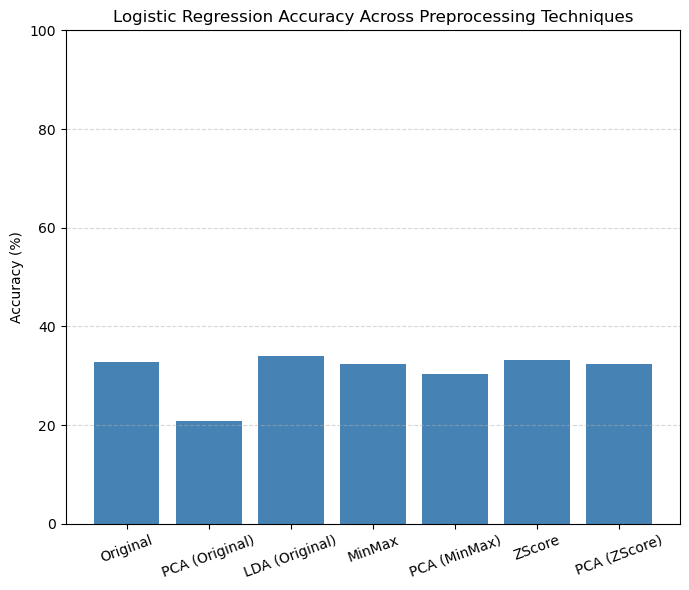

In [314]:
logreg_acc = {
    "Original": acc_logreg_original,
    "PCA (Original)": acc_logreg_pca,
    "LDA (Original)": acc_logreg_lda,
    "MinMax": acc_logreg_minmax,
    "PCA (MinMax)": acc_logreg_pca_minmax,
    "ZScore": acc_logreg_zscore,
    "PCA (ZScore)": acc_logreg_pca_zscore
}

plt.figure(figsize=(7, 6))
plt.bar(logreg_acc.keys(), [float(v) for v in logreg_acc.values()], color='steelblue')
plt.title("Logistic Regression Accuracy Across Preprocessing Techniques")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



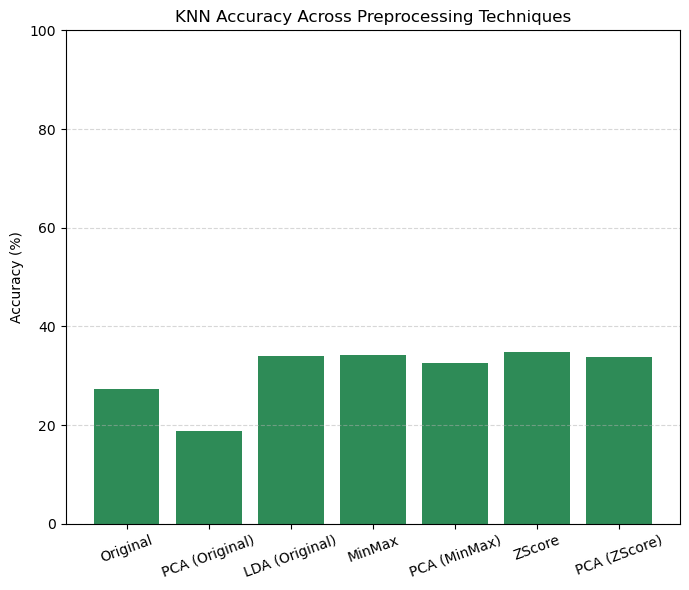

In [315]:
knn_acc = {
    "Original": acc_knn_original,
    "PCA (Original)": acc_knn_pca,
    "LDA (Original)": acc_knn_lda,
    "MinMax": acc_knn_minmax,
    "PCA (MinMax)": acc_knn_minmax_pca,
    "ZScore": acc_knn_zscore,
    "PCA (ZScore)": acc_knn_zscore_pca
}

plt.figure(figsize=(7, 6))
plt.bar(knn_acc.keys(), knn_acc.values(), color='seagreen')
plt.title("KNN Accuracy Across Preprocessing Techniques")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

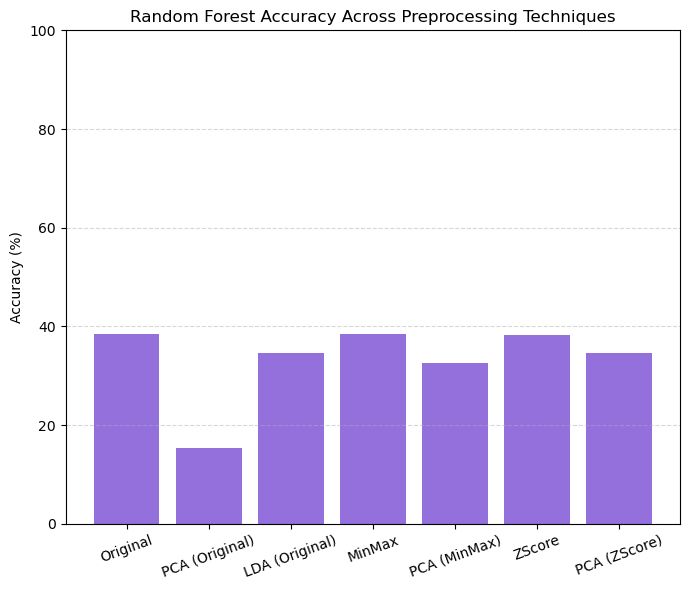

In [316]:
rf_acc = {
    "Original": acc_rf_original,
    "PCA (Original)": acc_rf_pca,
    "LDA (Original)": acc_rf_lda,
    "MinMax": acc_rf_minmax,
    "PCA (MinMax)": acc_rf_minmax_pca,
    "ZScore": acc_rf_zscore,
    "PCA (ZScore)": acc_rf_zscore_pca
}

plt.figure(figsize=(7, 6))
plt.bar(rf_acc.keys(), rf_acc.values(), color='mediumpurple')
plt.title("Random Forest Accuracy Across Preprocessing Techniques")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

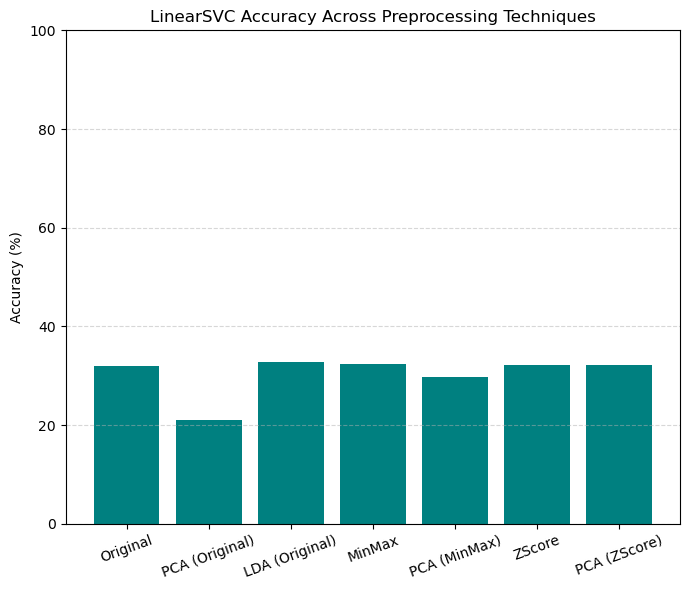

In [317]:
# 🔹 LinearSVC Accuracy Bar Graph

lsvc_acc = {
    "Original": acc_lsvc_original,
    "PCA (Original)": acc_lsvc_pca,
    "LDA (Original)": acc_lsvc_lda,
    "MinMax": acc_lsvc_minmax,
    "PCA (MinMax)": acc_lsvc_minmax_pca,
    "ZScore": acc_lsvc_zscore,
    "PCA (ZScore)": acc_lsvc_zscore_pca
}

plt.figure(figsize=(7, 6))
plt.bar(lsvc_acc.keys(), lsvc_acc.values(), color='teal')
plt.title("LinearSVC Accuracy Across Preprocessing Techniques")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

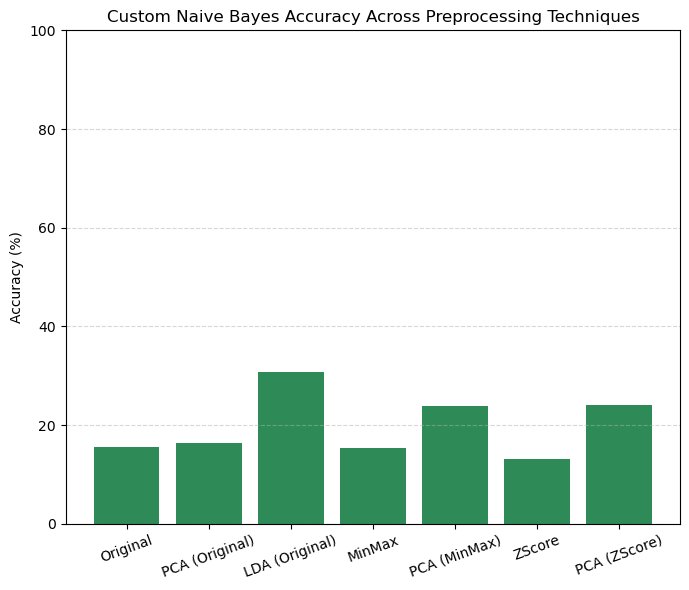

In [329]:
custom_nb_acc = {
    "Original": acc_custom_nb_original,
    "PCA (Original)": acc_custom_nb_pca,
    "LDA (Original)": acc_custom_nb_lda,
    "MinMax": acc_custom_nb_minmax,
    "PCA (MinMax)": acc_custom_nb_pca_minmax,
    "ZScore": acc_custom_nb_zscore,
    "PCA (ZScore)": acc_custom_nb_pca_zscore
}

plt.figure(figsize=(7, 6))
plt.bar(custom_nb_acc.keys(), [float(v) for v in custom_nb_acc.values()], color='seagreen')
plt.title("Custom Naive Bayes Accuracy Across Preprocessing Techniques")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

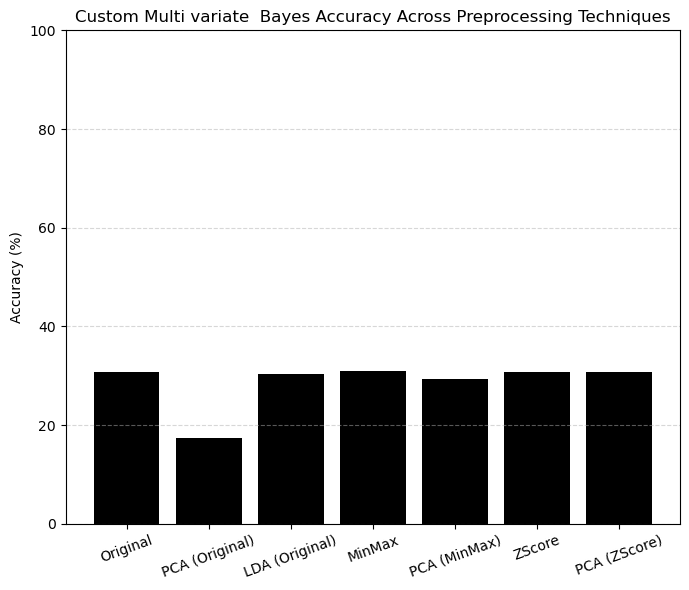

In [334]:
custom_mvb_acc = {
    "Original": acc_custom_mvb_original,
    "PCA (Original)": acc_custom_mvb_pca,
    "LDA (Original)": acc_custom_mvb_lda,
    "MinMax": acc_custom_mvb_minmax,
    "PCA (MinMax)": acc_custom_mvb_pca_minmax,
    "ZScore": acc_custom_mvb_zscore,
    "PCA (ZScore)": acc_custom_mvb_pca_zscore
}

plt.figure(figsize=(7, 6))
plt.bar(custom_mvb_acc.keys(), [float(v) for v in custom_mvb_acc.values()], color='black')
plt.title("Custom Multi variate  Bayes Accuracy Across Preprocessing Techniques")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

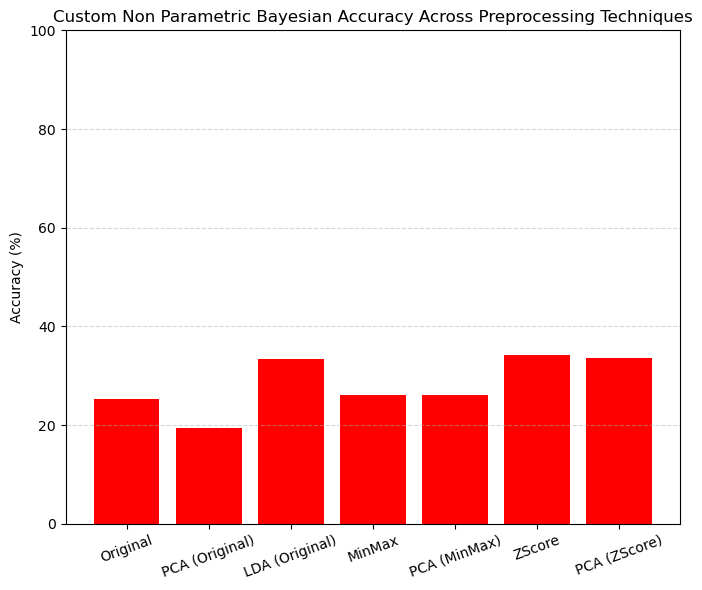

In [335]:
custom_npb_acc = {
    "Original": acc_custom_npb_original,
    "PCA (Original)": acc_custom_npb_pca,
    "LDA (Original)": acc_custom_npb_lda,
    "MinMax": acc_custom_npb_minmax,
    "PCA (MinMax)": acc_custom_npb_pca_minmax,
    "ZScore": acc_custom_npb_zscore,
    "PCA (ZScore)": acc_custom_npb_pca_zscore
}

plt.figure(figsize=(7, 6))
plt.bar(custom_npb_acc.keys(), [float(v) for v in custom_npb_acc.values()], color='red')
plt.title("Custom Non Parametric Bayesian Accuracy Across Preprocessing Techniques")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()